<a href="https://colab.research.google.com/github/kyungmo90/Ubion-Python/blob/main/%EC%96%B4%EB%A0%B5%EB%8B%A4_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2023 3차시 팀과제
#서울자전거데이터 머신러닝

#Y(종속변수): 빌린 자전거 개수
#X(독립변수) : 풍속
#X(통제변수) : 온도 , 풍속

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import genfromtxt
#서울시자전거데이터 마운트
df = pd.read_csv("/content/drive/MyDrive/SeoulBikeData.csv", encoding = "cp949")
df

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(캜)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(캜)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#칼럼 열 삭제제
df1 = df.drop(['Date','Visibility (10m)', 'Dew point temperature(캜)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)','Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day'], axis = 1)

In [ ]:
df1.info()
#  RangeIndex: 8760 = non-null 8760  null값은 없어보임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented Bike Count  8760 non-null   int64  
 1   Hour               8760 non-null   int64  
 2   Temperature(캜)     8760 non-null   float64
 3   Humidity(%)        8760 non-null   int64  
 4   Wind speed (m/s)   8760 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 342.3 KB


In [ ]:
#변수 rename 
df1.rename(columns={'Rented Bike Count': '빌린 자전거 갯수', 'Temperature(캜)': '온도', 'Humidity(%)':'습도', 'Hour':'시간'
                    ,'Wind speed (m/s)': '풍속',},inplace=True)

#'Seasons':'계절','Hour':'시간','Holiday':'휴무' (다음에 연습용 칼럼)

In [ ]:
df1.head()

,빌린 자전거 갯수,시간,온도,습도,풍속
0,254,0,-5.2,37,2.2
1,204,1,-5.5,38,0.8
2,173,2,-6.0,39,1.0
3,107,3,-6.2,40,0.9
4,78,4,-6.0,36,2.3


In [ ]:
df1.describe()

,빌린 자전거 갯수,시간,온도,습도,풍속
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909
std,644.997468,6.922582,11.944825,20.362413,1.036300
min,0.000000,0.000000,-17.800000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000
50%,504.500000,11.500000,13.700000,57.000000,1.500000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000
max,3556.000000,23.000000,39.400000,98.000000,7.400000


In [ ]:
df1.isnull().sum()

빌린 자전거 갯수    0
시간           0
온도           0
습도           0
풍속           0
dtype: int64

# 평균값과 중앙값을 그래프로 확인인

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47536 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  

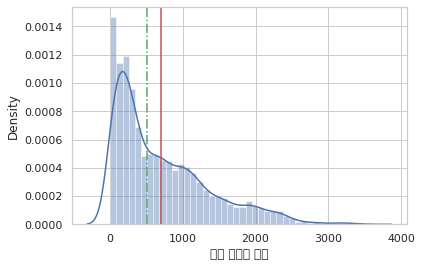

In [21]:
sns.distplot(df1['빌린 자전거 갯수'])
sns.set(style='whitegrid')
plt.axvline(df1['빌린 자전거 갯수'].mean(), ls='-', color='r') #평균값
plt.axvline(df1['빌린 자전거 갯수'].median(), ls='-.', color='g') # 중앙값
plt.show()
# df1[df1['빌린 자전거 갯수'] > 0].hist(column='빌린 자전거 갯수')

# IQR 붙여넣기 해서 이상치 제거해봤습니다

In [ ]:
q1 = df1["빌린 자전거 갯수"].quantile(q=0.25)
q3 = df1["빌린 자전거 갯수"].quantile(q=0.75)
IQR = q3-q1 #Q3 - Q1: 사분위수의 상위 75% 지점의 값과 하위 25% 지점의 값 차이
IQR #Interquartile range(사분위간 범위)

874.25

In [ ]:
data_IQR = df1[(df1["빌린 자전거 갯수"] < q3 + IQR * 1.5) & (df1["빌린 자전거 갯수"] > q1 - IQR * 1.5)] #1.5는 약속
data_IQR

,빌린 자전거 갯수,시간,온도,습도,풍속
0,254,0,-5.2,37,2.2
1,204,1,-5.5,38,0.8
2,173,2,-6.0,39,1.0
3,107,3,-6.2,40,0.9
4,78,4,-6.0,36,2.3
...,...,...,...,...,...
8755,1003,19,4.2,34,2.6
8756,764,20,3.4,37,2.3
8757,694,21,2.6,39,0.3
8758,712,22,2.1,41,1.0


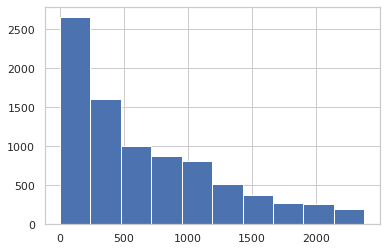

In [ ]:
data_IQR["빌린 자전거 갯수"].hist()

In [ ]:
data_outlier=df1[(df1["빌린 자전거 갯수"]>q3+IQR*1.5)] # q3 +IQR*1.5: 최댓값
data_outlier

,빌린 자전거 갯수,시간,온도,습도,풍속
2946,2401,18,20.7,54,4.1
2994,2402,18,16.0,47,2.1
3114,2401,18,14.8,24,1.3
3210,2404,18,17.5,18,1.3
3282,2692,18,17.0,28,3.1
...,...,...,...,...,...
7746,2631,18,16.6,40,2.4
7818,2613,18,17.3,43,0.9
7842,2415,18,14.5,71,2.1
7866,2612,18,15.1,53,1.7


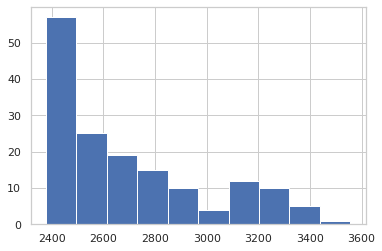

In [ ]:
data_outlier["빌린 자전거 갯수"].hist()

#DataFrame

# 좋아보이는 것들 다 불러와서 스케일 했습니다.
# 그리고 Y가 연속형이라서 리니어 리그레션 모델로 돌려봤습니다.

In [20]:
from sklearn.model_selection import train_test_split # train set과 test set을 나눈다
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
lr = LinearRegression().fit(X_train, Y_train)


X = df1[["시간", "온도", "습도"]]
Y = df1["빌린 자전거 갯수"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

scaler = StandardScaler().fit(X_train, Y_train)
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=9, p=2)
# 1은 메하탄 2는 뉴클리어데이타 

knn_reg.fit(X_train, Y_train)
Y_pred = knn_reg.predict(X_test)
print("accuracy: {:.3f}".format(knn_reg.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE: {:3f}".format(rmse))
# accuracy: 0.759 이 값은 트레이닝에 값이다 r2
# RMSE: 0.062762 주기의 오차

NameError: ignored

# 릿지 돌려봤습니다.

In [ ]:
from sklearn.linear_model import Ridge
lr_ridge = Ridge(random_state = 0).fit(X_train, Y_train)
Y_pred = lr_ridge.predict(X_test)
print("예측값(Y Predict value) \n", Y_pred)

예측값(Y Predict value) 
 [316.34455282 573.18086616 547.10055622 ... 615.0495792  178.65992925
 618.49378023]


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


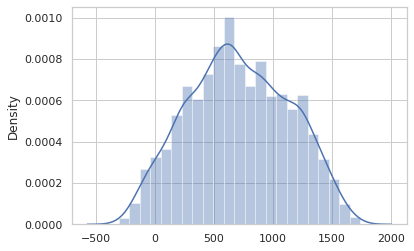

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family="NanumBarunGothic")

sns.distplot(Y_pred)

#SVR 돌려봤습니다.

In [ ]:
X = df1[["시간", "온도", "습도"]]
Y = df1["빌린 자전거 갯수"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
scaler = StandardScaler().fit(X_train, Y_train)
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

from sklearn.svm import SVR

SVR_model = SVR(C=1, kernel = "linear", epsilon=0.1)
SVR_model.fit(X_train, Y_train)
Y_pred = SVR_model.predict(X_test)
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE: {:.3f}".format(rmse))
print(SVR_model.coef_)

RMSE: 482.383
[[ 136.23086791  310.07753064 -120.20411847]]


# 깜빡하고 릿지를 한번 더 돌린것 같습니다.

In [ ]:
from sklearn.linear_model import Ridge
lr_ridge = Ridge(random_state = 0).fit(X_train, Y_train)
Y_pred = lr_ridge.predict(X_test)
print("예측값(Y Predict value) \n", Y_pred)

예측값(Y Predict value) 
 [316.34455282 573.18086616 547.10055622 ... 615.0495792  178.65992925
 618.49378023]


In [ ]:
rmse = sqrt (mean_squared_error(Y_test, Y_pred))
print("ridge R2 : {:.3f}".format(lr_ridge.score(X_train, Y_train)))
print("RMSE : {:.3f}". format(rmse))
#비교
print("lr R2 : {:.3f}".format(lr.score(X_train, Y_train)))

ridge R2 : 0.454
RMSE : 475.606
lr R2 : 0.454


# 라쏘를 돌려봤습니다.

In [ ]:
#라쏘
from sklearn.linear_model import Lasso

lr_lasso = Lasso(random_state = 0, alpha = 0.01, max_iter = 1000).fit(X_train, Y_train)
Y_pred = lr_lasso.predict(X_test)

print("예측값(Y predidct value) \n", Y_pred)

예측값(Y predidct value) 
 [316.31022478 573.1844059  547.06621423 ... 615.04471898 178.58891221
 618.46590949]


In [ ]:
rmse = sqrt (mean_squared_error(Y_test, Y_pred))
print("lasso R2 : {:.3f}".format(lr_lasso.score(X_train, Y_train)))
print("RMSE : {:.3f}". format(rmse))
#비교
print("lr R2 : {:.3f}".format(lr.score(X_train, Y_train)))
print("ridge R2 : {:3f}".format(lr_ridge.score(X_train, Y_train)))

# rmse가 점점 떨어진다(예측력이 좋아졌다.)
# 릿지가 라쏘보다 성능이 좀 더 떨어지는데 큰 데이터는 라쏘가 더 나음.

lasso R2 : 0.454
RMSE : 475.605
lr R2 : 0.454
ridge R2 : 0.453751


# DecisionTreeRegressor로 돌려봤습니다.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

from sklearn.tree import DecisionTreeRegressor

DT_model_reg = DecisionTreeRegressor(random_state = 0, max_depth = 5)
DT_model_reg.fit(X_train, Y_train)
Y_pred = DT_model_reg.predict(X_test)
print("accuracy : {:.3f}".format(DT_model_reg.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("rmse : {:.3f}".format(rmse))

accuracy : 0.665
rmse : 391.109


# Knn regressor로 돌려봤습니다.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

scaler = StandardScaler().fit(X_train, Y_train)
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=9, p=2)
# 1은 메하탄 2는 뉴클리어데이타 


knn_reg.fit(X_train, Y_train)
Y_pred = knn_reg.predict(X_test)
print("accuracy: {:.3f}".format(knn_reg.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE: {:3f}".format(rmse))
# accuracy: 0.759 이 값은 트레이닝에 값이다 r2
# RMSE: 0.062762 주기의 오차

accuracy: 0.776
RMSE: 347.478200


# 밑에는 아직 정리가 안됐습니다.
# 사실 완전히 이해 못하고 짜집기 해서 이상한 부분이 많습니다.

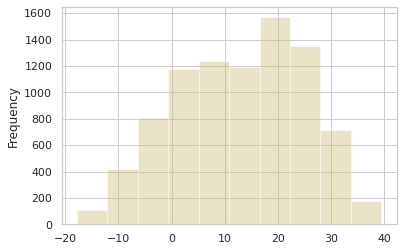

In [ ]:
df1['온도'].plot.hist(color = 'y',alpha=0.4,grid=True)

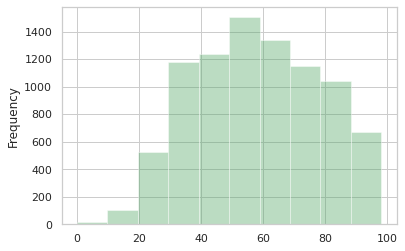

In [ ]:
df1['습도'].plot.hist(color = 'g',alpha=0.4,grid=True)

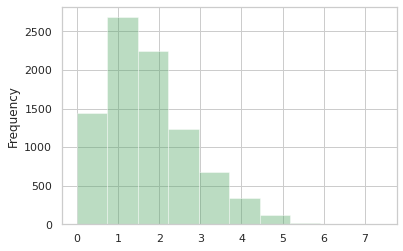

In [ ]:
df1['풍속'].plot.hist(color = 'g',alpha=0.4,grid=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import accuracy_score

In [ ]:
X = df1[["온도", "습도","풍속"]]
Y = df1["빌린 자전거 갯수"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

lrmodel = LinearRegression() # LinearRegression 모델을 초기화
lrmodel.fit(X_train, Y_train) # train_X와 train_Y 데이터로 모델을 학습

# 2.학습된 파라미터 값을 불러오기
beta_0 = lrmodel.intercept_ #
beta_1 = lrmodel.coef_[0] # 
beta_2 = lrmodel.coef_[1] #
beta_3 = lrmodel.coef_[2] 

print("beta_0: %f" % beta_0)
print("beta_1: %f" % beta_1)
print("beta_2: %f" % beta_2)
print("beta_3: %f" % beta_3)


beta_0: 753.234097
beta_1: 31.708131
beta_2: -8.703278
beta_3: 32.158417


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn. model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
X = df1[["온도", "습도","풍속"]]
Y = df1["빌린 자전거 갯수"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

model = KNeighborsRegressor()

score = cross_val_score(model, X_train, Y_train, cv = 5)
print("교차검증 점수 :",score)

교차검증 점수 : [0.41003536 0.37897665 0.41436168 0.41092568 0.41225989]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
X = df1[["온도", "습도","풍속"]]
Y = df1["빌린 자전거 갯수"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

model = KNeighborsClassifier()

mylist = list(range(1,50))
k_list = [x for x in mylist if x %2 !=0]

parameter_grid = {"n_neighbors" : k_list}


grid_search = GridSearchCV(model, parameter_grid, cv = 10 )
grid_search.fit(X_train, Y_train)



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43, 45, 47, 49]})

In [ ]:
grid_search = GridSearchCV(model, parameter_grid, cv = 10 )
grid_search.fit(X_train, Y_train)
grid_search.best_params_
grid_search.cv_results_

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


{'mean_fit_time': array([0.00652456, 0.00692773, 0.00633152, 0.00615077, 0.00672042,
        0.00624971, 0.00643842, 0.00668848, 0.00662258, 0.00651672,
        0.00646837, 0.00688732, 0.00634191, 0.00635586, 0.00648267,
        0.00734801, 0.00622888, 0.00705307, 0.00668287, 0.00674403,
        0.00623524, 0.00735784, 0.00675223, 0.00670495, 0.0069849 ]),
 'std_fit_time': array([0.0006448 , 0.0009828 , 0.00057229, 0.00020182, 0.00087064,
        0.00032984, 0.00082648, 0.00087886, 0.00036508, 0.00060691,
        0.00050621, 0.00150383, 0.00059793, 0.00047782, 0.00060505,
        0.00199662, 0.00017795, 0.00107298, 0.00106019, 0.00115479,
        0.00030689, 0.00083063, 0.00023267, 0.00017673, 0.00076638]),
 'mean_score_time': array([0.01863737, 0.02210622, 0.01980374, 0.01910429, 0.02177067,
        0.02001879, 0.02011812, 0.02027018, 0.02375503, 0.02259183,
        0.0217772 , 0.02563903, 0.02294989, 0.02305417, 0.02319016,
        0.02487094, 0.02220881, 0.02417924, 0.02450361, 0.02

In [ ]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=49)

In [ ]:

be = grid_search.best_estimator_
pred = be.predict (X_test) 
accuracy_score(Y_test, pred)

0.03729071537290715

In [ ]:
df1.dtypes

빌린 자전거 갯수      int64
시간             int64
온도           float64
습도             int64
풍속           float64
dtype: object